# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [64]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [65]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [66]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [67]:
X = boston.data
y = boston.target

# 3. Train test split

In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3)

# 4. Simple Linear Model

In [69]:
from sklearn.linear_model import LinearRegression
Ir = LinearRegression()
Ir.fit(xtrain, ytrain)

LinearRegression()

In [70]:
Ir.score(xtrain, ytrain)

0.7811025081093688

In [71]:
Ir.score(xtest, ytest)

0.560256802136004

# 5. Ridge Regularization for Linear Model

In [72]:
from sklearn.linear_model import Ridge
modeIr = Ridge(alpha=100)
modeIr.fit(xtrain,ytrain)
modeIr.score(xtrain,ytrain)

0.7448827537321763

In [73]:
modeIr.score(xtest,ytest)

0.6336284147019444

# 6. Lasso Regularization for Linear Model

In [74]:
from sklearn.linear_model import Lasso
modeIr = Lasso(alpha=100)
modeIr.fit(xtrain,ytrain)
modeIr.score(xtrain,ytrain)

0.24091911037031744

In [75]:
modeIr.score(xtest,ytest)

0.16680116631970077

# 7. Polynomial Regression of degree



In [76]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrain_poly = pf.fit_transform(xtrain)
xtest_poly = pf.fit_transform(xtest)

In [77]:
Lrp = LinearRegression()
Lrp.fit(xtrain,ytrain)
Lrp.score(xtrain,ytrain)

0.7811025081093688

In [78]:
Lrp.score(xtest,ytest)

0.560256802136004

# 8. Ridge Regularization for Polynomial model

In [79]:
modeLrp = Ridge(alpha=100)
modeLrp.fit(xtrain,ytrain)
modeLrp.score(xtrain,ytrain)

0.7448827537321763

In [80]:
modeLrp.score(xtest,ytest)

0.6336284147019444

# 9. Lasso Regularization for Polynomial model

In [81]:
modeLrp = Lasso(alpha=10)
modeLrp.fit(xtrain_poly,ytrain)
modeLrp.score(xtrain_poly,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+03, tolerance: 3.112e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8626140165075812

In [82]:
modeLrp.score(xtest_poly,ytest)

0.7897596065313355

# 10. Select K Best

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func=f_regression, k=7)
x_selected = kb.fit_transform(xtrain, ytrain)
x_selected[0]


array([  4.86 ,   0.426,   6.302,   4.   , 281.   ,  19.   ,   6.72 ])

In [84]:
model = LinearRegression()
model.fit(x_selected, ytrain)

LinearRegression()

In [85]:
x_selected = kb.fit_transform(xtest,ytest)
x_selected[1]

array([ 18.1  ,   0.693,   5.531, 666.   ,  20.2  , 329.46 ,  27.38 ])

In [86]:
model.fit(xtrain, ytrain)
model.score(xtrain, ytrain)

0.7811025081093688

In [97]:
tdf = pd.DataFrame(xtest, columns=boston.feature_names)
tdf

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     6.71772   0.0  18.10   0.0  0.713  6.749   92.6  2.3236  24.0  666.0   
1    41.52920   0.0  18.10   0.0  0.693  5.531   85.4  1.6074  24.0  666.0   
2     0.97617   0.0  21.89   0.0  0.624  5.757   98.4  2.3460   4.0  437.0   
3     0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
4    24.39380   0.0  18.10   0.0  0.700  4.652  100.0  1.4672  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
147   4.42228   0.0  18.10   0.0  0.584  6.003   94.5  2.5403  24.0  666.0   
148   5.66998   0.0  18.10   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
149   0.14030  22.0   5.86   0.0  0.431  6.487   13.0  7.3967   7.0  330.0   
150   8.49213   0.0  18.10   0.0  0.584  6.348   86.1  2.0527  24.0  666.0   
151   0.19802   0.0  10.59   0.0  0.489  6.182   42.4  3.9454   4.0  277.0   

     PTRATIO       B  LSTAT  
0       20.2    0.32  17.44  
1       20.2  329.46  27.38  
2       21.2  262.76  17.31  
3       16.6  396.90  14.69  
4       20.2  396.90  28.28  
..       ...     ...    ...  
147     20.2  331.29  21.32  
148     20.2  375.33   3.73  
149     19.1  396.28   5.90  
150     20.2   83.45  17.64  
151     18.6  393.63   9.47  

[152 rows x 13 columns]

In [89]:
traindf = pd.DataFrame(data = xtrain, columns=boston.feature_names)
traindf['target'] = ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS   RAD    TAX  \
0   0.03659  25.0   4.86   0.0  0.426  6.302  32.2   5.4007   4.0  281.0   
1   0.09103   0.0   2.46   0.0  0.488  7.155  92.2   2.7006   3.0  193.0   
2   0.04301  80.0   1.91   0.0  0.413  5.663  21.9  10.5857   4.0  334.0   
3  22.05110   0.0  18.10   0.0  0.740  5.818  92.4   1.8662  24.0  666.0   
4   4.87141   0.0  18.10   0.0  0.614  6.484  93.6   2.3053  24.0  666.0   

   PTRATIO       B  LSTAT  target  
0     19.0  396.90   6.72    24.8  
1     17.8  394.12   4.82    37.9  
2     22.0  382.80   8.05    18.2  
3     20.2  391.45  22.11    10.5  
4     20.2  396.21  18.68    16.7

In [90]:
testdf = pd.DataFrame(data = xtest, columns=boston.feature_names)
testdf['target'] = ytest
testdf.head()

CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0   6.71772  0.0  18.10   0.0  0.713  6.749   92.6  2.3236  24.0  666.0   
1  41.52920  0.0  18.10   0.0  0.693  5.531   85.4  1.6074  24.0  666.0   
2   0.97617  0.0  21.89   0.0  0.624  5.757   98.4  2.3460   4.0  437.0   
3   0.13914  0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
4  24.39380  0.0  18.10   0.0  0.700  4.652  100.0  1.4672  24.0  666.0   

   PTRATIO       B  LSTAT  target  
0     20.2    0.32  17.44    13.4  
1     20.2  329.46  27.38     8.5  
2     21.2  262.76  17.31    15.6  
3     16.6  396.90  14.69    23.1  
4     20.2  396.90  28.28    10.5

In [91]:
correlation = testdf.corr()
correlation

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.193570  0.416952 -0.058996  0.429026 -0.279975  0.342913   
ZN      -0.193570  1.000000 -0.473472 -0.093799 -0.492740  0.257052 -0.534474   
INDUS    0.416952 -0.473472  1.000000  0.089892  0.773715 -0.450422  0.614663   
CHAS    -0.058996 -0.093799  0.089892  1.000000  0.164694  0.056949  0.154834   
NOX      0.429026 -0.492740  0.773715  0.164694  1.000000 -0.381658  0.712858   
RM      -0.279975  0.257052 -0.450422  0.056949 -0.381658  1.000000 -0.294799   
AGE      0.342913 -0.534474  0.614663  0.154834  0.712858 -0.294799  1.000000   
DIS     -0.398616  0.669431 -0.704220 -0.139723 -0.755538  0.281315 -0.775929   
RAD      0.655511 -0.261241  0.574128 -0.011353  0.607642 -0.252483  0.446714   
TAX      0.605271 -0.281032  0.720214 -0.022576  0.680464 -0.344154  0.500754   
PTRATIO  0.306096 -0.340548  0.382344 -0.227921  0.223384 -0.275386  0.284023   
B       -0.470997  0.167761 -0.377275 -0.017830 -0.434059  0.071526 -0.279503   
LSTAT    0.417267 -0.356380  0.621053 -0.001303  0.611768 -0.506443  0.610391   
target  -0.379054  0.248846 -0.454276  0.130056 -0.447469  0.515678 -0.298867   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.398616  0.655511  0.605271  0.306096 -0.470997  0.417267 -0.379054  
ZN       0.669431 -0.261241 -0.281032 -0.340548  0.167761 -0.356380  0.248846  
INDUS   -0.704220  0.574128  0.720214  0.382344 -0.377275  0.621053 -0.454276  
CHAS    -0.139723 -0.011353 -0.022576 -0.227921 -0.017830 -0.001303  0.130056  
NOX     -0.755538  0.607642  0.680464  0.223384 -0.434059  0.611768 -0.447469  
RM       0.281315 -0.252483 -0.344154 -0.275386  0.071526 -0.506443  0.515678  
AGE     -0.775929  0.446714  0.500754  0.284023 -0.279503  0.610391 -0.298867  
DIS      1.000000 -0.498329 -0.543935 -0.307247  0.322227 -0.505026  0.214906  
RAD     -0.498329  1.000000  0.898718  0.460959 -0.491388  0.421333 -0.298474  
TAX     -0.543935  0.898718  1.000000  0.466487 -0.487721  0.506823 -0.411877  
PTRATIO -0.307247  0.460959  0.466487  1.000000 -0.230327  0.302752 -0.379370  
B        0.322227 -0.491388 -0.487721 -0.230327  1.000000 -0.331922  0.381653  
LSTAT   -0.505026  0.421333  0.506823  0.302752 -0.331922  1.000000 -0.728466  
target   0.214906 -0.298474 -0.411877 -0.379370  0.381653 -0.728466  1.000000

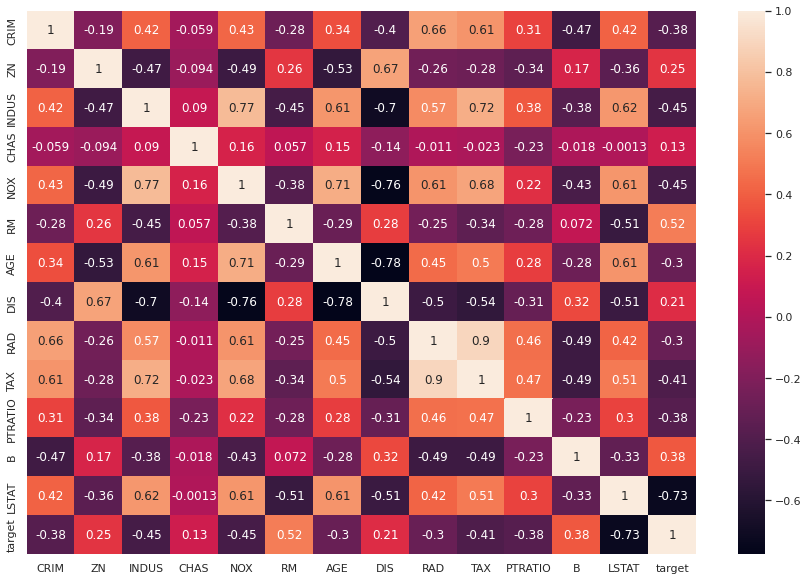

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = correlation, annot = True)
plt.show()



In [93]:
selected_columns = ['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']

In [94]:
train_selected = traindf[selected_columns]
test_selected = testdf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0   6.71772  18.10  0.713  6.749  666.0     20.2  17.44
1  41.52920  18.10  0.693  5.531  666.0     20.2  27.38
2   0.97617  21.89  0.624  5.757  437.0     21.2  17.31
3   0.13914   4.05  0.510  5.572  296.0     16.6  14.69
4  24.39380  18.10  0.700  4.652  666.0     20.2  28.28

In [95]:
kmodel = LinearRegression()
kmodel.fit(train_selected,ytrain)
kmodel.score(train_selected,ytrain)

0.7426289899408844

# 11. Conclusion

In order to overcome the issue of over fitting and underfitting of data, we use regularization method. We implement the Ridge and lasso regression to regularize ("shrink") coefficients where the estimated coefficients are pushed towards 0 to make them work better on new data-sets ("optimized for prediction"). Thus, avoiding over-fitting in a complex model. Here, we don't have to perform features slection if we perform lasso regression. We implement polynomial regression as it gives our regression line a curvilinear shape and makes it more suitable for data compared to linear regression. By applying a higher order polynomial, we are able to fit the regression line data more precisely.



